In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Загружаем необходимые библиотеки

In [2]:
df = pd.read_csv('task3.csv', sep=',')

Импортируем наш датасет

In [3]:
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Вывод: для построения модели прогнозирования оценки расходов были использованы 4 фактора такие как уровень CustomerID, семейное положение, возраст и годовой доход. Количество наблюдений 200.

D:\progs\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


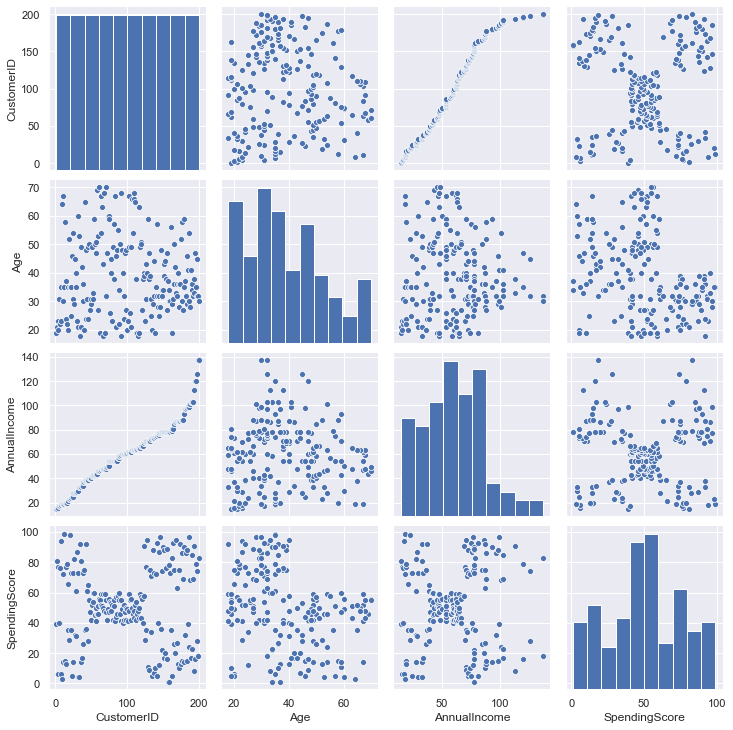

In [4]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [5]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Описываем основные статистики наших данных. Можем видеть среднее значение по каждой переменной, стандартное отклонение, минимум, максимум и сколько попадает в 25%, 50% и 75%.

In [6]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

Проверяем и заменяем пропуски на средние значения в числовых столбцах датасета.

In [7]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df1[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Проверяем на выбросы датасет и избавляемся от них.

In [8]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Так как статистика не поменялась, можно сделать вывод, что выбросов не было.

In [9]:
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Производим кодирование всех качественных переменных, в нашем случае только столбец Genre.

In [10]:
df = encoding_char(df)

In [11]:
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['CustomerID','Genre','Age','AnnualIncome','SpendingScore'])

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,0.000000,0.0,0.019231,0.000000,0.387755
1,0.005025,0.0,0.057692,0.000000,0.816327
2,0.010050,1.0,0.038462,0.008197,0.051020
3,0.015075,1.0,0.096154,0.008197,0.775510
4,0.020101,1.0,0.250000,0.016393,0.397959
...,...,...,...,...,...
195,0.979899,1.0,0.326923,0.860656,0.795918
196,0.984925,1.0,0.519231,0.909836,0.275510
197,0.989950,0.0,0.269231,0.909836,0.744898
198,0.994975,0.0,0.269231,1.000000,0.173469


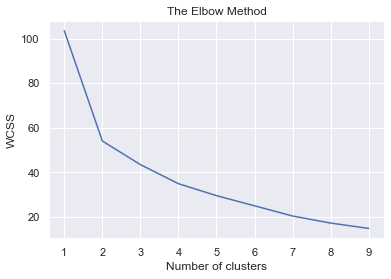

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Используем метод "локтя" для определения количества кластеров. Видим резкое изменение на значении 2.

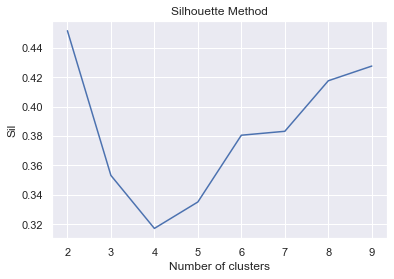

2:0.45157033770569127
3:0.3532046923192799
4:0.31714747009313293
5:0.3351318102555648
6:0.3805253606035523
7:0.3831938587780169
8:0.4175643409146506
9:0.4275460406020818


In [14]:
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

Применяем метод силуэта от 2 до 10 кластеров. МЫ стремимся найти максимум и как видим на 2-ух кластерах значение = 0,45.Будем использовать 4 кластера.

In [15]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 2, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['CustomerID','Genre','Age','AnnualIncome','SpendingScore'])

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,0.518787,-4.440892e-16,0.419362,0.387109,0.484810
1,0.485239,1.000000e+00,0.386504,0.362705,0.515579


Используем метод К-средних и выведем ядра кластеров.

In [16]:
X = df[:, [0, 2, 3, 4]]

In [17]:
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['CustomerID','Age','AnnualIncome','SpendingScore'])

,CustomerID,Age,AnnualIncome,SpendingScore
0,0.760063,0.329352,0.552632,0.504726
1,0.264704,0.465751,0.211319,0.499611


Построим функцию на 2-ух кластерах и выведем ядра кластеров. Характеристика кластеров: 1) Люди младше 35 лет, имеющие доход меньше 50, имеют оценку расходов 50; 2)  Люди старше 35 лет, имеющие доход больше 50, имеют оценку расходов 53.

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [19]:
X = df[:, [0, 2, 3, 4]]

In [20]:
pip install SimpSOM

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\progs\Anaconda\python.exe -m pip install --upgrade pip' command.


In [21]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(8, 14, X, PBC=True)
net.train(0.01, 1000)


Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done! 


Обучим модель на 1000 случаях, задав размерность 8х14, желаемая функция потери 1%.

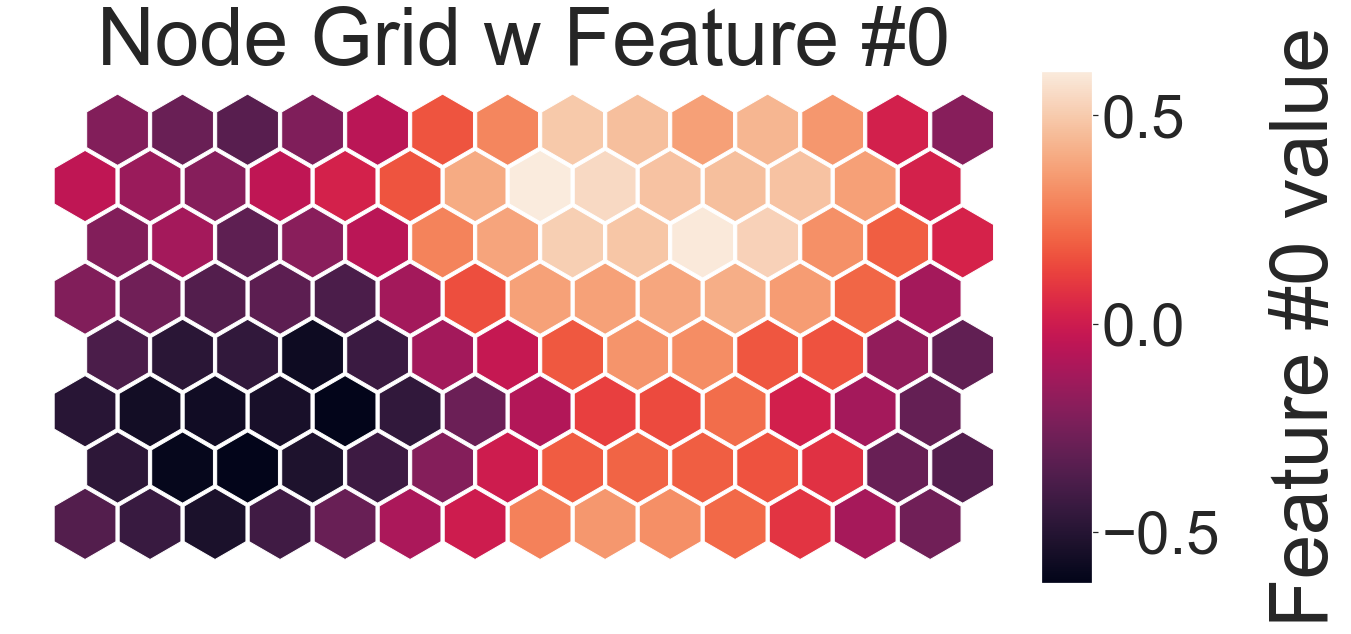

In [22]:
net.nodes_graph(colnum=0)

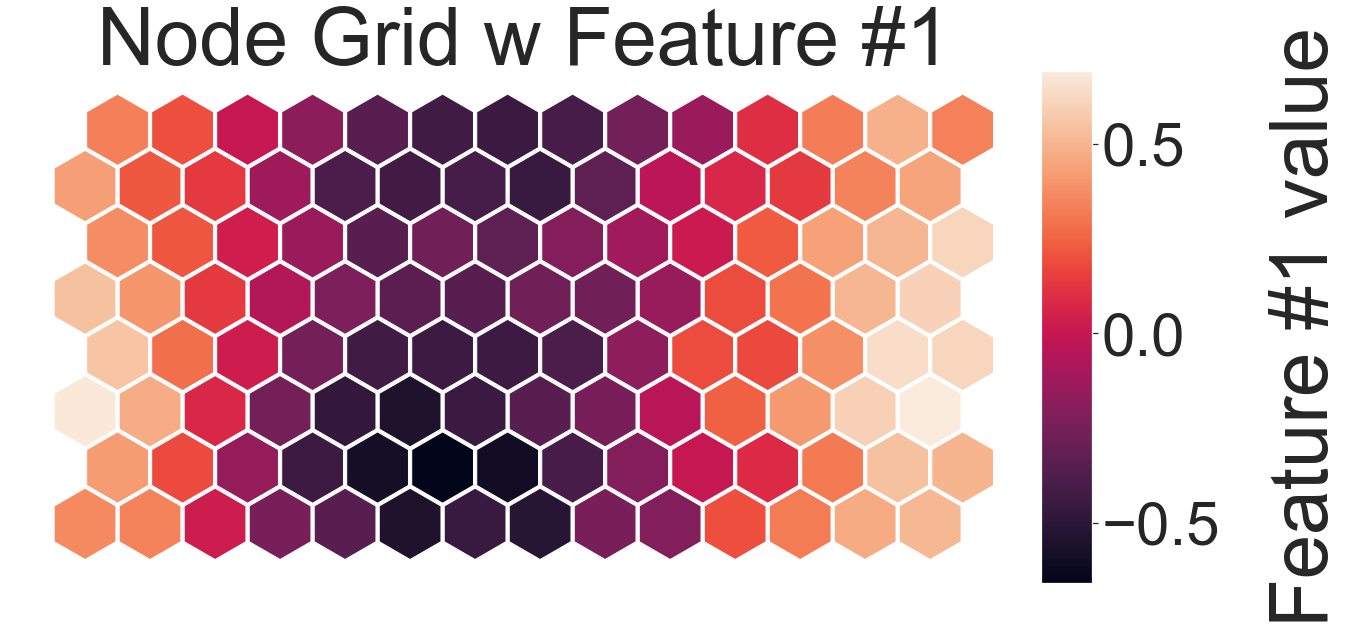

In [23]:

net.nodes_graph(colnum=1)

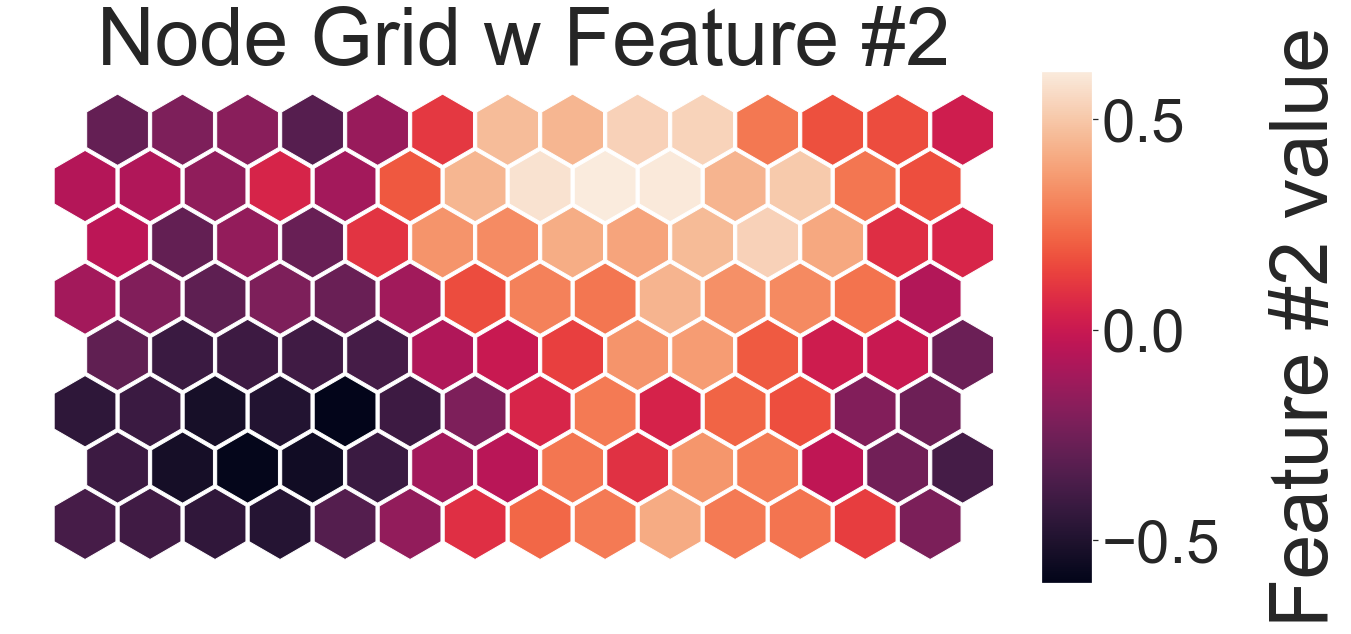

In [24]:
net.nodes_graph(colnum=2)

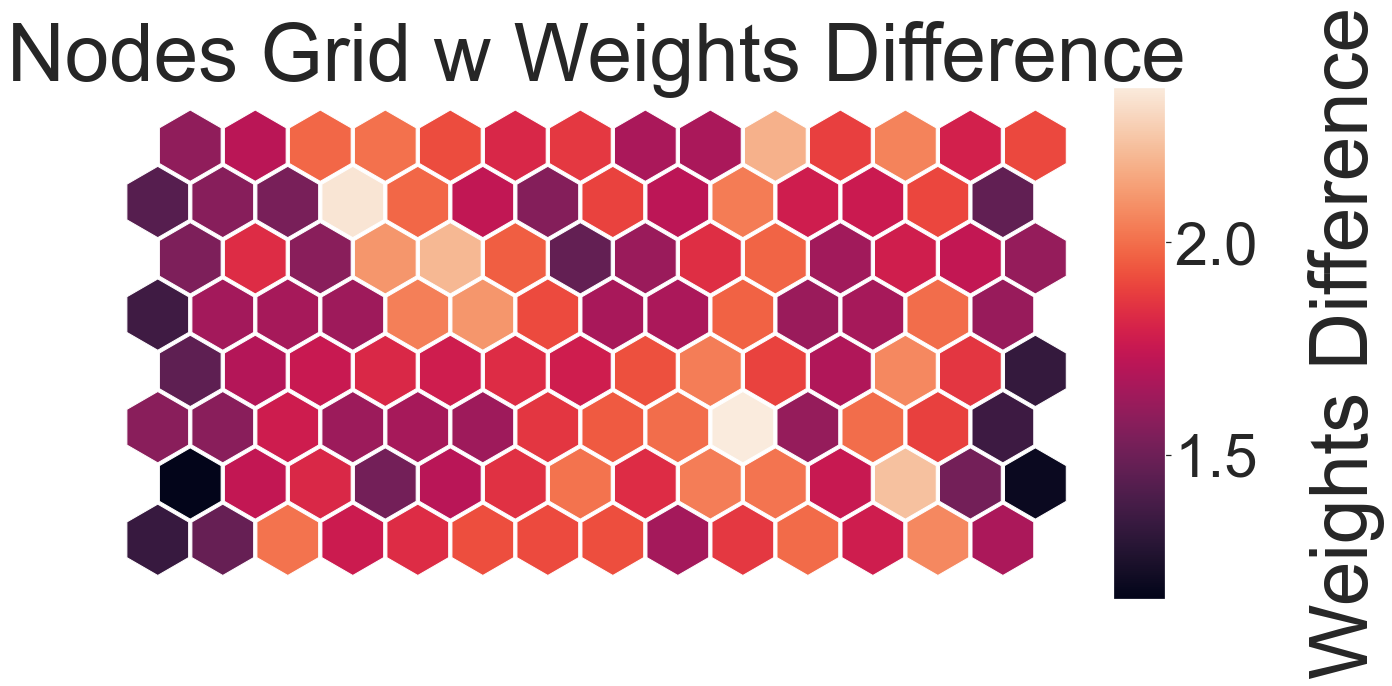

In [25]:
net.diff_graph()

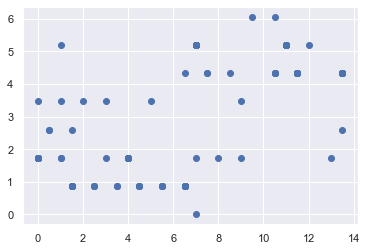

In [26]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()


In [27]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(prj)

In [28]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.5016017474526836

Как видим из результатов кластеризации 50% клиентов были определены верно.